# Futures Data Exploration with yfinance 
Let's fetch and explore real futures data together!

We'll look at:
- S&P 500 Futures (`ES=F`)
- Crude Oil Futures (`CL=F`)
- Gold Futures (`GC=F`)

---

In [11]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')

# Load Futures Data 📈
Let's pull 6 months of data for ES=F (S&P500), CL=F (Oil), GC=F (Gold).

In [12]:
tickers = ['ES=F', 'CL=F', 'GC=F']

futures_data = {}
for ticker in tickers:
    futures_data[ticker] = yf.download(ticker, period='6mo')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# Plot Futures Prices 📊

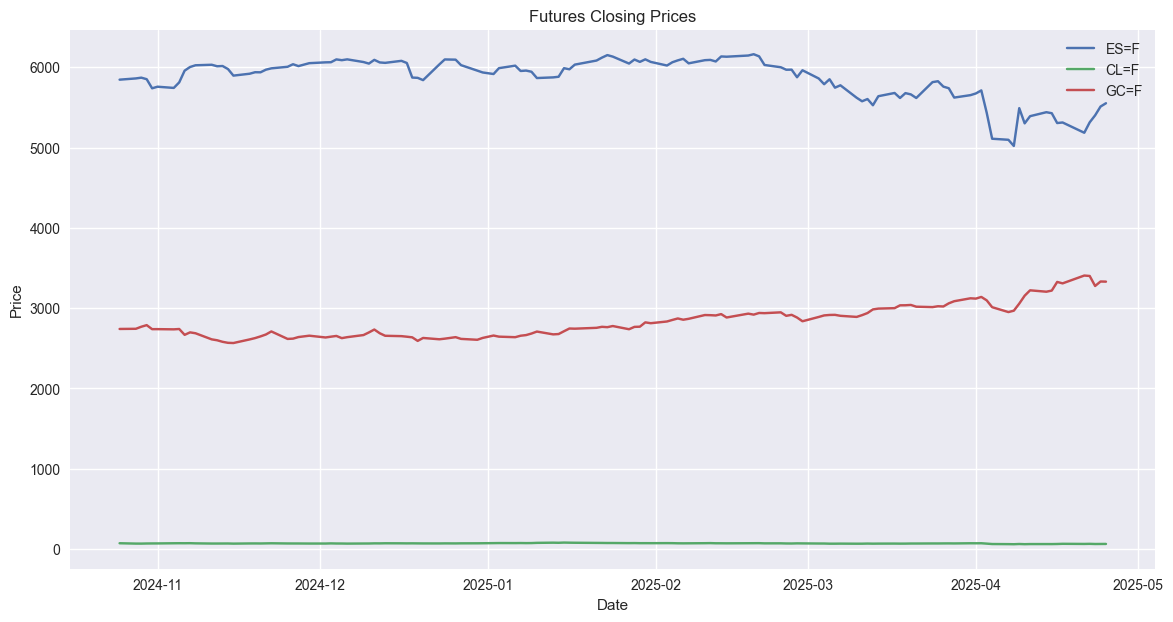

In [13]:
fig, ax = plt.subplots(figsize=(14, 7))

for ticker, data in futures_data.items():
    ax.plot(data.index, data['Close'], label=ticker)

ax.set_title('Futures Closing Prices')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend()
ax.grid(True)
plt.show()

# Analyze Daily Returns ⚡
Volatility is key in futures markets.

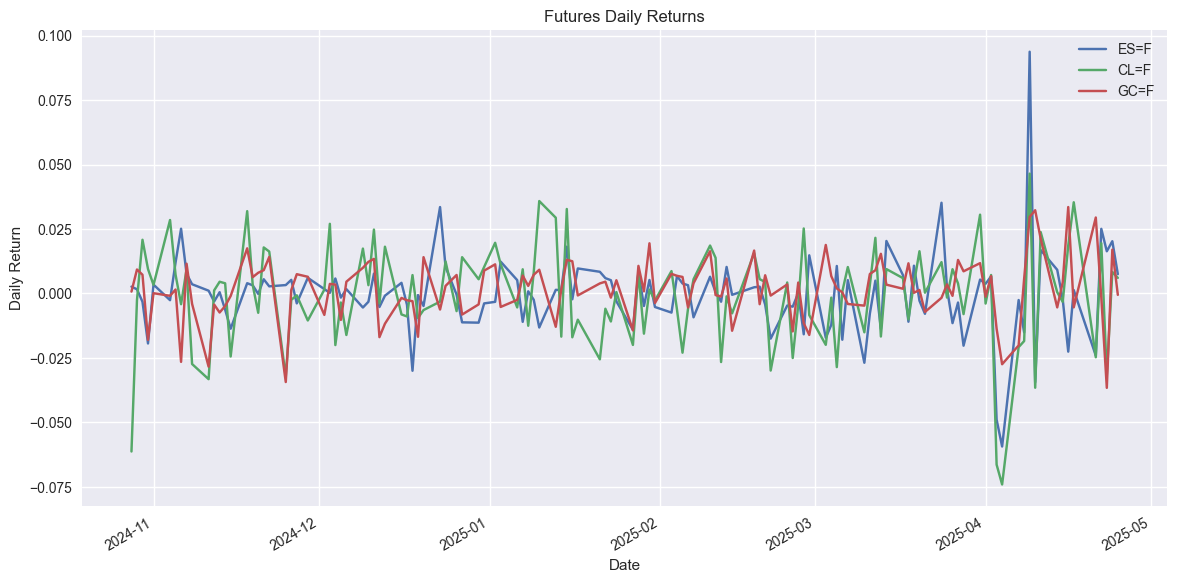

In [14]:
# Calculate daily returns
returns = {}
for ticker, data in futures_data.items():
    if not data.empty and 'Close' in data:
        series = data['Close'].pct_change().dropna()
        if not series.empty:
            returns[ticker] = series

# ⚡ Build the DataFrame carefully
if returns:
    returns_df = pd.concat(returns.values(), axis=1)
    returns_df.columns = list(returns.keys())
    
    returns_df.plot(figsize=(14,7), title='Futures Daily Returns')
    plt.xlabel('Date')
    plt.ylabel('Daily Return')
    plt.show()
else:
    print("⚠️ No returns data available to plot.")

# Volatility Comparison 📈
Let's check the standard deviation of returns to measure volatility.

In [15]:
print(returns_df.std().sort_values(ascending=False))

CL=F    0.019647
ES=F    0.015728
GC=F    0.012077
dtype: float64


# Conclusion 

- Oil (CL=F) usually has the highest volatility.
- S&P 500 (ES=F) is relatively more stable.
- Gold (GC=F) can be volatile during crises.

Next: We can compare futures vs stocks! 🚀